## Market Basket Analysis using Apriori algorithm. (9a)

In [1]:
pip --version

pip 21.2.4 from C:\Anaconda\lib\site-packages\pip (python 3.9)

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Step 2: Create a sample dataset
data = [['Bread', 'Milk', 'Butter', 'Eggs'],
        ['Bread', 'Milk', 'Cheese', 'Eggs'],
        ['Bread', 'Butter', 'Cookies'],
        ['Milk', 'Eggs', 'Cheese'],
        ['Bread', 'Milk', 'Eggs', 'Yogurt']]

#data = pd.read_csv('diabetes.csv')
#print(data.head())


# Step 3: Convert the dataset into a one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(data).transform(data)
df = pd.DataFrame(te_ary, columns=te.columns_)
print(df.head())

# Step 4: Find frequent itemsets using Apriori
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
print("Frequent Itemsets:")
print(frequent_itemsets)

# Step 5: Generate association rules
rules = association_rules(frequent_itemsets, min_threshold=1)
print("\nAssociation Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence' ]])

   Bread  Butter  Cheese  Cookies   Eggs   Milk  Yogurt
0   True    True   False    False   True   True   False
1   True   False    True    False   True   True   False
2   True    True   False     True  False  False   False
3  False   False    True    False   True   True   False
4   True   False   False    False   True   True    True
Frequent Itemsets:
   support             itemsets
0      0.8              (Bread)
1      0.8               (Eggs)
2      0.8               (Milk)
3      0.6        (Eggs, Bread)
4      0.6        (Bread, Milk)
5      0.8         (Eggs, Milk)
6      0.6  (Eggs, Bread, Milk)

Association Rules:
     antecedents consequents  support  confidence
0         (Eggs)      (Milk)      0.8         1.0
1         (Milk)      (Eggs)      0.8         1.0
2  (Eggs, Bread)      (Milk)      0.6         1.0
3  (Bread, Milk)      (Eggs)      0.6         1.0


## Classification of data using Bayesian approach. (9b)

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Prepare the Dataset
# Sample dataset: age, income, buys_product
data = np.array([[25, 50000, 0],
                 [30, 70000, 0],
                 [35, 90000, 1],
                 [20, 30000, 0],
                 [40, 100000, 1]])



X = data[:, :-1]  # Features: age, income
y = data[:, -1]   # Target variable: buys_product

# Step 3: Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Naive Bayes Classifier
clf = GaussianNB()
clf.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = clf.predict(X_test)

# Step 6: Evaluate the Classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



## Diabetes Diagnosis using Decision Tree Induction. (9c)

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Load the Dataset
data = pd.read_csv('diabetes.csv')
print(data.head())

# Step 3: Data Preprocessing
# Split the dataset into features (X) and target variable (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build the Decision Tree Model
# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Step 5: Make Predictions
# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Generate a classification report
print(classification_report(y_test, y_pred))


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Accuracy: 74.68%
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg  

## Data Clustering using K-Means Algorithm (9d)

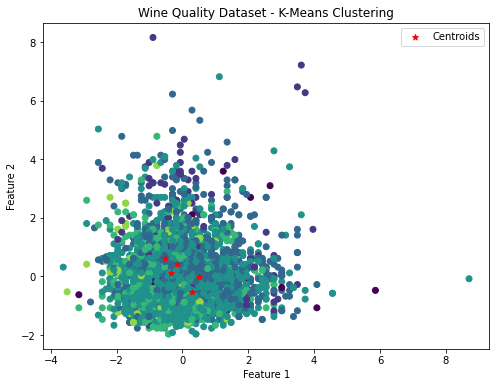

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv('winequality_white.csv')

# Check if the dataset has a header row
if df.columns[0] == 0:
    # If the first column is 0, use the default column names
    df.columns = [f'col_{i}' for i in range(len(df.columns))]

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:, :-1])  # Exclude the last column (target)

# Split the dataset into features and target
X = df_scaled
y = df.iloc[:, -1]  # Assuming the last column is the target variable

# Create and fit the K-means model
kmeans = KMeans(n_clusters=5, max_iter=400, verbose=False, tol=0.2)
predictions = kmeans.fit_predict(X)

# Plot the data points
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', c='red', label='Centroids')
plt.title('Wine Quality Dataset - K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## Predicting Housing Prices using K-Nearest Neighbors (KNN) Algorithm (9e)

## Text Classification for Spam Detection using Text Mining.


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download required NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Load the dataset
spam_data = pd.read_csv('spam.csv', encoding='latin-1')

# Preprocess the data
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    # Stem the words
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    
    return text

spam_data['text'] = spam_data['v2'].apply(preprocess_text)

# Split the data into training and testing sets
X = spam_data['text']
y = spam_data['v1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature extraction
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, y_train)

# Make predictions
y_pred = nb_model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91866\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91866\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Accuracy: 0.99
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       965
        spam       0.98      0.91      0.94       150

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115

